### YBS VERİ MADENCİLİĞİ FİNAL PROJESİ

##### Hazırlayan : Barış Mete
##### Numara     : 2102131407


### Projenin açıklanması
Meme kanserinde kadınlarda en yaygın olan ve akçiğer kanserinden sonra en sık ölüm nedeni olan kanserdir. Kadınlarda gözlenen kanserin %24 ünü ve kanserin sebep olduğu ölümlerin %14 ünü oluşturmaktadır. Meme kanserinnin erken teşhisi hastalara erken klinik tedaviyi teşvik ederek hayatta kalma şansını büyük ölçüde arttırabilir. Bu insan sağlığı açısından önemli hale gelmiş olup bazı bilgilere dayalı tahminler olası duruma gelmiştir. Bu çalışmada verilere dayalı olarak bir hastada meme kanserini tespit etmeye çalıştık.

#### Veri Setinde Uygulanan Model Uygulamaları Sırasıya :
- Karar Ağaçı Regresyonu Uygulaması (Decision Tree Regressor)
- Rassal Orman Uygulanması (Random Forest)
- Linner Regresyon Uygulaması (Linear Regressor)
- Lojisitik Regresyon Uygulaması (Logistic Regression)


### Veri Setinin Tanıtılması
Üzerinde çalışılan veri seti bir veri bilimi topluğu olan Kaggle(https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download) aracılağı ile elde edilmişdir.

#### Veriler Üzerinde Öznitelik Bilgileri
- 1.Kimlik Numarası 2.Tanı = (M = kötü huylu, B = iyi huylu,3-32)

#### Her hücre çekirdeği için on gerçek değerli özellik hesaplanır
- yarıçap
- doku
- çevre
- alan
- pürüzsüzlük
- kompaktlık
- içbükeylik
- içbükey noktaları
- simetri
- fraktal boyut("kıyı yaklaşım" - 1)
- Bu özelliklerin ortalama , standart hata ve "en kötü" ve "en büyüğü" her görüntü için hesapnadı ve sonuçta 30 özellik elde edildi.

### Veri Ön İşleme
Verilerin Bağımlı ve Bağımsız değişken Olarak Ayrılması
Veri setindeki bağımlı ve bağımsız değişkenleri(özellikleri) belirlememizin nedeni sınıflandırma algoritmasını kullanabilmemiz içindir. Böylece sadece bizim belirlediğimiz bağımsız değişkenlerden yola çıkarak bağımlı değişken tahmini yapılmasıdır.

#### Bağımısı Değişken
- Tanı
#### Bağımlı Değişkenler
- yarıçap
- doku
- çevre
- alan
- pürüzsüzlük
- kompaktlık
- içbükeylik
- içbükey noktaları
- simetri
- fraktal boyut

Veri setimizde 32 adet özellik bulunmaktadır.Biz bu çalışmada özelliklerden 1 tanesini bağımlı değişken olarak belirledik.

In [53]:
#Temel Kütüphanler:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
#Verilerin yüklenmesi:
df = pd.read_csv("data.csv", sep=",")

#Bağımsız değişkenler:
X = df.iloc[:,[2,3,4,5,6,7,8,9,10,11]]

#Bağımlı değişken:
Y = df.loc[:,["diagnosis"]]

print ("Bağımsız Değişkkenler:\n{}\n Bağımlı Değişkenler:\n{}".format(X,Y))

df

Bağımsız Değişkkenler:
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  c

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [55]:
#Veri setindeki satır ve sutun sayısı
df.shape

(569, 33)

In [56]:
#Veri setindeki eksik veri analizi
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [57]:
#Veri setinde en son sutunda hiç değer olmadığı için siliyoruz.
df = df.dropna(axis=1)

In [58]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
# Maling(M)kanserli ile Being(B) kanser olmayan hücrelere sahip sataların sayısına bakalım.
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\brsme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

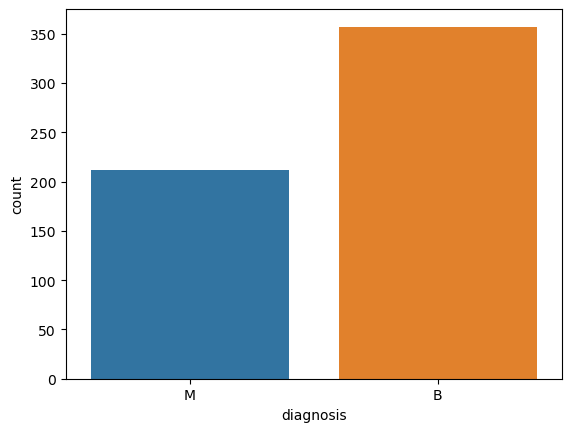

In [60]:
# Bu değerleri görşelleştirelim 
sns.countplot(df["diagnosis"],label="Count")

In [61]:
#Verilerilerimin tiplerine bakıyoruz
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Kategorik Verilerin Kodlanması
"Diaonosis" sütündaki değerleri sırasoyla M ve B'den 1 ve 0'a değiştirdik.

Bu işlem için Sklearn kütüphanesi içerisinden LavelEncoder kulandı.

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

C:\Users\brsme\AppData\Local\Temp\ipykernel_9292\1032688988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)


In [63]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [64]:
X = df.iloc[:,2:11].values
Y = df.iloc[:,1].values

### Verilerin Test ve Eğitim Olarak Bölünmesi
Algoritmayı önce eğitip sonra test edebilmek için verileri test ve eğitim olarak bölmemiz gerekmektedir. Baağımlı ve bağımsız değişkenler kendi içlerinde eğitim ve test oalrak ikiye bölünecektir. %75 eğitim ve %25 test olarak ikiye bölünecektir.

Bu işlem için Sklearn kütüphanesi içerisinden train_test_split kullanıldı.Ve test oranı olarak 0.25 alınmıştır.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [66]:
#Tüm özellikleri aynı sklada gösterelim
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 ### 1) Veri Setine  Karar Ağaçı Regresyonu (Decision Tree Regressor) Uygalama
 

In [67]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor(criterion="mse", random_state=0)
treeRegressor.fit(X_train, Y_train)

C:\Users\brsme\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', random_state=0)

In [68]:
#Tahmin yapılması
y_pred = treeRegressor.predict(X_test)

In [69]:
#Eğitim verilerindeki doğruluk puanı
print("Karar Ağaçları Regresyonun Doğruluk Puanı: ",treeRegressor.score(X_train,Y_train))

Karar Ağaçları Regresyonun Doğruluk Puanı:  1.0


### Karar Ağaçlarının Regresyon Analizin Sonuçları ve Değerlendirilmesi

#### Confusion Matrix (Karmaşıklık Matrisi) Oluşturulması :
Tahminlerin doğruluğu ve sapması hakkında bilgi edinebilmek için Confusion Matrix kullandık.

- (0,0) Değeri: Kanser(M) sınıfının doğru tahmini 
- (0,1) Değeri: Gerçek Kanser(M) iken tahmininin Kanser Değil(B) olması 
- (1,0) Değeri: Gerçek Kanser Değil(M) iken tahmininin Kanser(M) olması 
- (1,1) Değeri: Kanser Değil(B) sınıfının doğru tahmini

Bu işlem için Sklearn kütüphanesi içerisinden confusion_matrix kullanılmıştır.

In [70]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[83,  7],
       [ 4, 49]], dtype=int64)

**Confusion Matrix Sonucu :**  Sınıflandırma modelimiz  Kanser(M) olan 7 kişinin Kanser Değil(B) ve Kanser Değil(B) olan 4 kişiyi Kanser(M) olarak tahmin etmiştir.

In [71]:
# Accuary Score : Doğruluk değeri hseaplanması
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,y_pred)
ac

0.9230769230769231

**Accuary Score Sonucu:** Sınıflandırma modelimiz %92 başarı elde etmiştir , ama yanılma payı bulunmaktadır.

### 2) Veri Setine Rassal Orman (Random Forest) Uygulanması

In [72]:
from sklearn.ensemble import RandomForestClassifier

rasRegressor = RandomForestClassifier(n_estimators = 10, criterion="entropy", random_state=0)
rasRegressor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [73]:
#Tahmin yapılması
y_pred = rasRegressor.predict(X_test)

In [74]:
#Eğitim verilerindeki doğruluk puanı
print(" Rassal Orman Regresyonun Doğruluk Puanı: ",rasRegressor.score(X_train,Y_train))

 Rassal Orman Regresyonun Doğruluk Puanı:  0.9906103286384976


In [75]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[87,  3],
       [ 4, 49]], dtype=int64)

**Confusion Matrix Sonucu:** Sınıflandırma modelimiz Kanser(M) olan 3 kişinin Kanser Değil(B) ve Kanser Değil(B) olan 4 kişiyi Kanser(M) olarak tahmin etmiştir.

In [76]:
# Accuary Score : Doğruluk değeri hseaplanması
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,y_pred)
ac

0.951048951048951

**Accuary Score Sonucu:** Sınıflandırma modelimiz %95 başarı elde etmiştir , ama yanılma payı bulunmaktadır.

İki analiz karşılaştıcak olursak bu aşamada Rassal Orman modeli , Karar Ağaçı modeline göre daha iyi bir doğruluk tahmini yapmıştır.

### 3) Veri Seti için Linner Regresyon Analiz (Linear Regression) Uygulaması

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)

LinearRegression()

In [78]:
#Tahminin Yapılması 
y_pred = linearRegression.predict(X_test)

In [79]:
#Eğitim verilerindeki doğruluk puanı
print(" Lineer Regresyonun Doğruluk Puanı: ",linearRegression.score(X_train,Y_train))

 Lineer Regresyonun Doğruluk Puanı:  0.6872886720035499


In [92]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[86,  4],
       [ 4, 49]], dtype=int64)

**Confusion Matrix Sonucu:** Sınıflandırma modelimiz Kanser(M) olan 4 kişinin Kanser Değil(B) ve Kanser Değil(B) olan 4 kişiyi Kanser(M) olarak tahmin etmiştir.

In [93]:
# Accuary Score : Doğruluk değeri hseaplanması
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,y_pred)
ac

0.9440559440559441

**Accuary Score Sonucu:** Sınıflandırma modelimiz %94 başarı elde etmiştir , ama yanılma payı bulunmaktadır.

In [80]:
#Gerçek değerler ile tahmin edilen değerlerin karşılaştırılması
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07859438382005524


C:\Users\brsme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


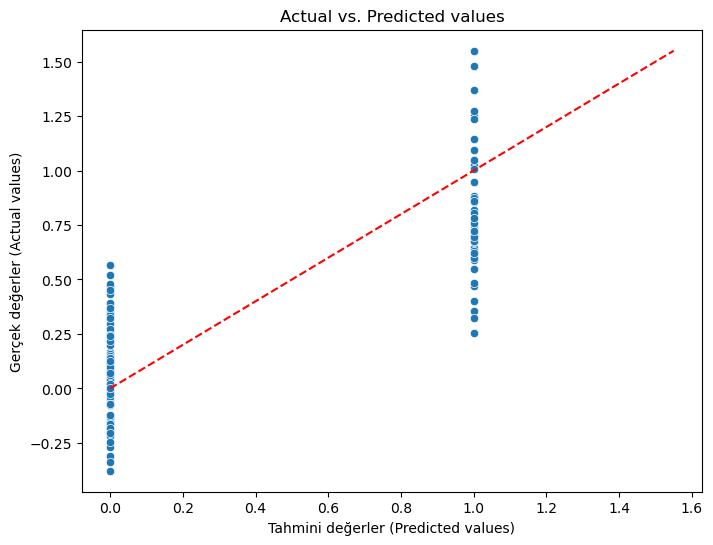

In [81]:
#Öngörülen ve gerçek değerler arasındaki ilişkiyi gösteren grafik
plt.figure(figsize=(8, 6))
sns.scatterplot(Y_test, y_pred)
plt.plot([min(Y_test), max(y_pred)], [min(Y_test), max(y_pred)], color='red', linestyle='--')
plt.xlabel("Tahmini değerler (Predicted values)")
plt.ylabel("Gerçek değerler (Actual values)")
plt.title("Actual vs. Predicted values")
plt.show()

### Veri Seti için Lojisitik Regresyon Analiz (Logistic Regression) Uygulaması

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, Y_train)

LogisticRegression()

In [83]:
#Tahminin Yapılması 
y_pred = logisticRegression.predict(X_test)

In [84]:
#Eğitim verilerindeki doğruluk puanı
print(" Lojistik Regresyonun Doğruluk Puanı: ",logisticRegression.score(X_train,Y_train))

 Lojistik Regresyonun Doğruluk Puanı:  0.9413145539906104


In [85]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[86,  4],
       [ 4, 49]], dtype=int64)

**Confusion Matrix Sonucu:** Sınıflandırma modelimiz Kanser(M) olan 4 kişinin Kanser Değil(B) ve Kanser Değil(B) olan 4 kişiyi Kanser(M) olarak tahmin etmiştir.

In [86]:
# Accuary Score : Doğruluk değeri hseaplanması
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,y_pred)
ac

0.9440559440559441

**Accuary Score Sonucu:** Sınıflandırma modelimiz %94 başarı elde etmiştir , ama yanılma payı bulunmaktadır.

In [87]:
#Gerçek değerler ile tahmin edilen değerlerin karşılaştırılması
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.055944055944055944


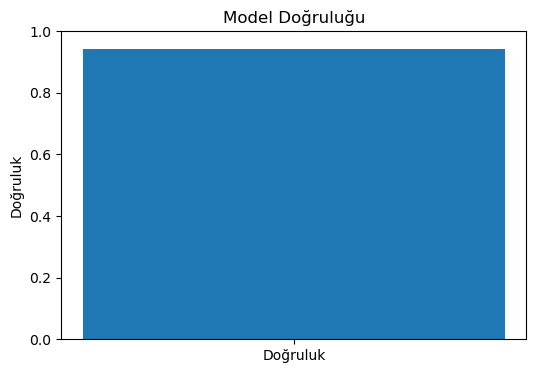

In [91]:
# Doğruluk Grafiği
plt.figure(figsize=(6, 4))
plt.bar(["Doğruluk"], [ac])
plt.ylim([0, 1])
plt.title("Model Doğruluğu")
plt.ylabel("Doğruluk")
plt.show()

##### Bütün bu çalışmalara baktğımız en iyi tahmin eden modelimiz Rassal Orman (Random Forest) Uygulalamsı %95 oranında doğruluk oranına sahiptir , ama yanılma payı vardır.